In [1]:
import json
import numpy as np
import gudhi

systems = []
for i in range(8):
    with open("./elite-galaxy-0{}.json".format(i)) as f:
        systems.append(json.load(f))

In [2]:
with open("./uniform_random_coordinates.json") as f:
    systems.append(json.load(f))

In [20]:
n = len(systems)
n

9

In [4]:
# tutorials:
# https://github.com/GUDHI/TDA-tutorial
# https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-persistence-diagrams.ipynb

# ref:
# https://gudhi.inria.fr/python/latest/persistent_cohomology_user.html
# https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0179-3

In [10]:
systems[8] = [dict(location = u ) for u in systems[8]]

In [257]:
def makeRipsComplex(galaxy):
    # TODO: truncate distances for legacy code. calculate complex from (lower diagonal) distance matrix
    rips = gudhi.RipsComplex(points=[[u['location'][0], u['location'][1]/2] for u in galaxy], max_edge_length=50)
    tree = rips.create_simplex_tree(max_dimension=2)
    tree.persistence() # returns persistence intervals
    return tree

In [258]:
def makeResultStr(simplex_tree):
    return 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
        repr(simplex_tree.num_simplices()) + ' simplices - ' + \
        repr(simplex_tree.num_vertices()) + ' vertices.'

In [259]:
complexes = [makeRipsComplex(u) for u in systems]

In [260]:
[u.betti_numbers() for u in complexes]

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]

In [261]:
makeResultStr(complexes[5])

'Rips complex is of dimension 2 - 73900 simplices - 256 vertices.'

In [262]:
intervals_edges = [u.persistence_intervals_in_dimension(0) for u in complexes]

In [263]:
intervals_loops = [u.persistence_intervals_in_dimension(1) for u in complexes]

In [264]:
# intervals_quads = [u.persistence_intervals_in_dimension(2) for u in complexes]

In [265]:
bottleneck_edges = np.zeros((n, n))
for i in range(n):
    for j in range(i):
        bottleneck_edges[i,j] = gudhi.bottleneck_distance(intervals_edges[i], intervals_edges[j])
print(np.array2string(bottleneck_edges, max_line_width=np.inf))

[[0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [1.4564386  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [3.59448519 2.13804659 0.         0.         0.         0.         0.         0.         0.        ]
 [1.99913251 1.6873781  1.59535268 0.         0.         0.         0.         0.         0.        ]
 [1.34874436 1.10555128 2.24574083 0.90270609 0.         0.         0.         0.         0.        ]
 [6.83950872 5.38307012 3.24502353 4.84037621 5.49076436 0.         0.         0.         0.        ]
 [1.99913251 1.90889163 1.72833545 1.65872425 1.94704405 4.84037621 0.         0.         0.        ]
 [4.51656516 3.06012656 1.97005548 2.51743265 3.16782079 2.32294357 2.51743265 0.         0.        ]
 [2.10295968 1.54637595 1.54102241 1.2144035  1.36487957 4.73654904 1.07152984 2.41360548 0.        ]]


In [266]:
bottleneck = np.zeros((n, n))
intervals = [u.persistence_intervals_in_dimension(1) for u in complexes]
for i in range(n):
    for j in range(i):
        bottleneck[i,j] = gudhi.bottleneck_distance(intervals[i], intervals[j])
print(np.array2string(bottleneck, max_line_width=np.inf))

[[0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [8.20892627 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [3.41921356 6.74911053 0.         0.         0.         0.         0.         0.         0.        ]
 [3.19518951 7.20188626 3.41921356 0.         0.         0.         0.         0.         0.        ]
 [3.42065832 6.69651642 4.21655147 3.68238276 0.         0.         0.         0.         0.        ]
 [2.96940578 7.1403073  2.97804672 3.21490929 3.98468863 0.         0.         0.         0.        ]
 [4.92932733 3.78989395 3.46951159 4.29308982 4.08799321 3.86070836 0.         0.         0.        ]
 [4.13013732 4.60842743 3.60397844 3.49358666 2.97156906 3.88983851 3.53121954 0.         0.        ]
 [5.30222758 5.40223861 3.84241183 4.99166011 4.60910868 4.23360861 3.69483139 5.36604873 0.        ]]


In [166]:
filtration = [[k for k in tree.get_filtration()] for tree in complexes]

In [167]:
# filtration[0]

In [168]:
with open('filtration.json', 'w') as f:
    json.dump(filtration, f)

In [128]:
# Graphical analysis

In [129]:
import matplotlib.pyplot as plt

In [267]:
def makeBarcode(persistence, axes, xlim, max_intervals = 0):
    gudhi.plot_persistence_barcode(persistence, fontsize=8, axes = axes, max_intervals = max_intervals)
    axes.set_xlim(xlim)
    axes.set_ylim([0,70])
    axes.set_yticks([])
    axes.set_title('')

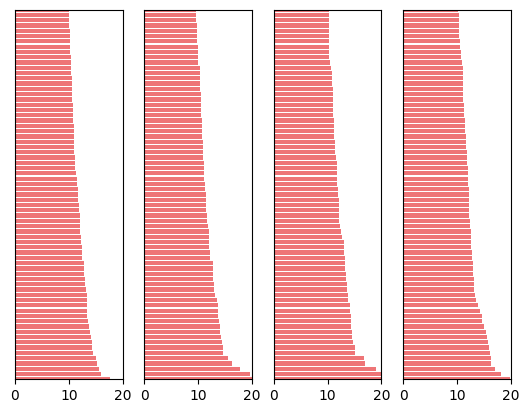

In [268]:
# fig, axs = plt.subplots(2, 4)
# for i in range(4):
    # for j in range(2):
        # makeBarcode(intervals_edges[j*4+i], axs[j,i], [0,20])
fig, axs = plt.subplots(1,4)
makeBarcode(intervals_edges[0], axs[0], [0,20])
makeBarcode(intervals_edges[2], axs[1], [0,20])
makeBarcode(intervals_edges[5], axs[2], [0,20])
makeBarcode(intervals_edges[8], axs[3], [0,20])

In [269]:
[len([x for x in intervals_edges[i] if x[1] > 10]) for i in range(0,n)]

[68, 65, 62, 62, 66, 77, 72, 71, 77]

### Higher dimensions

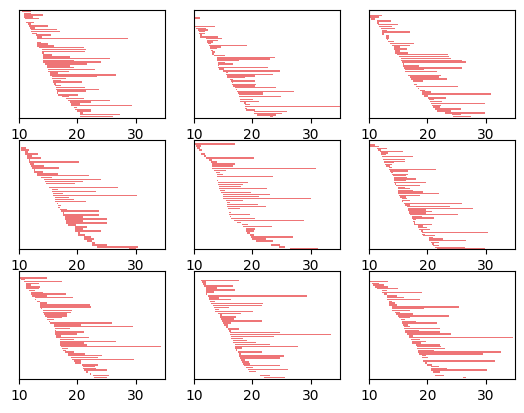

In [132]:
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        makeBarcode(intervals_loops[j*3+i], axs[j,i], [10, 35])

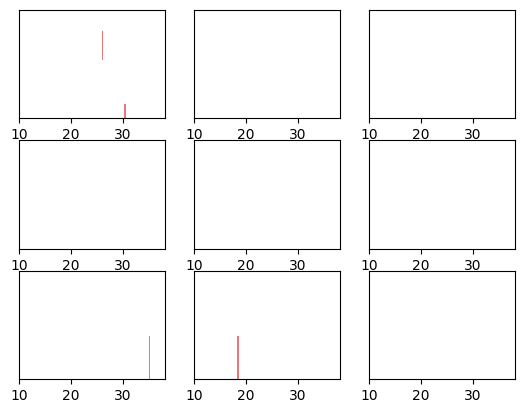

In [150]:
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        makeBarcode(intervals_quads[j*3+i], axs[j,i], [10, 38])

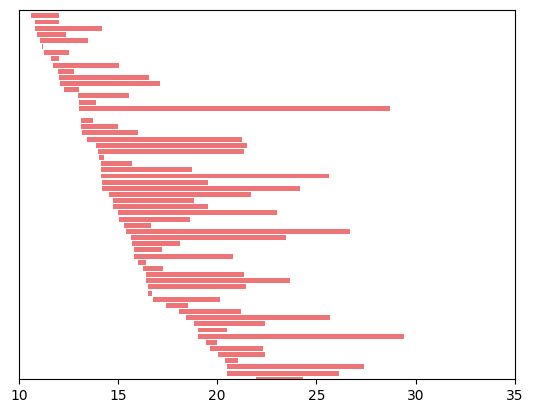

In [153]:
fig, axs = plt.subplots(1,1)
makeBarcode(intervals_loops[0], axs, [10, 35])

In [134]:
def makePlot(simplex_tree, axes=None):
    diag = simplex_tree.persistence()
    gudhi.plot_persistence_diagram(diag, axes=axes, fontsize=8)
    axes.set_yticks([])

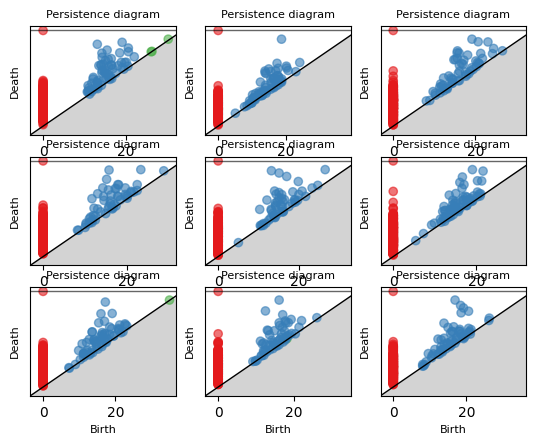

In [135]:
fig, axs = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        makePlot(complexes[j*3+i], axs[j,i])